<a href="https://colab.research.google.com/github/hpsuresh12345/Autoreview/blob/master/Tweets_Market_Survey_02Nov2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import tweepy as tw
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
% matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
df = pd.read_excel('Tweets_Infotainment_DashCam_15Oct2019.xlsx')
df.head()

,Tweets,Category
0,Our Top Pick of The Best Parking Mode Dash Cam...,Positive
1,Still watching #Russian #dashcam compilations ...,Neutral
2,Check out this great travel dash cam for your ...,Positive
3,Shortcut! #trafficcircle #dashcam https://t.co...,Neutral
4,Our DMS alarms include:①Closed Eyes②Yawning③In...,Neutral


In [0]:
#Magic Command to print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [23]:
df.shape

(207, 2)

# Data preprocessing

In [24]:
#Check for NaN values in each column
df.isna().sum()

Tweets      0
Category    0
dtype: int64

In [25]:
#Percentage of NaN values
((len(df)-df.count())/len(df))*100

Tweets      0.0
Category    0.0
dtype: float64

Negative     21
Neutral      71
Positive    115
Name: Category, dtype: int64

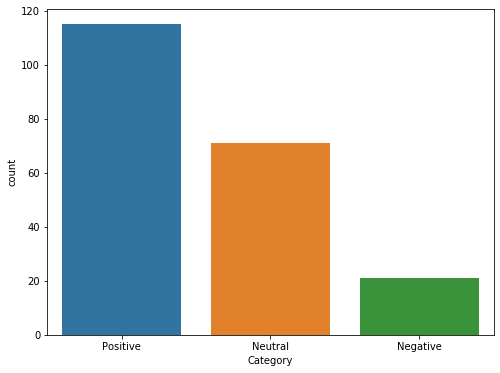

In [26]:
#Sentiment Count 
sentiment_count = df.Category.value_counts()
#Airline Review Count
Tweets_total = df['Tweets'].value_counts()

# examine the class distribution
df.Category.value_counts().sort_index()

sns.countplot(x = 'Category', data = df)

In [27]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

8.0
6.0


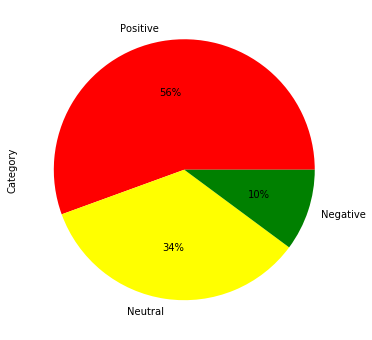

In [28]:
df.Category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [0]:
PT=df.groupby("Category")
PTs=PT.get_group("Positive")

In [64]:
PTs.head()

,Tweets,Category
0,Our Top Pick of The Best Parking Mode Dash Cam...,Positive
2,Check out this great travel dash cam for your ...,Positive
6,Check out this great travel dash cam for your ...,Positive
10,@BrieThiele @JoshBreslowWKRN @WKRN Thx) #Hands...,Positive
12,Check out this great travel dash cam for your ...,Positive


In [18]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
PTs.tail()

,Tweets,Category
195,Yellow Mini bad dutch driving - September '19 ...,Positive
196,Check out this great travel dash cam for your ...,Positive
202,From @WIRED: Essential Gear for Every Driver-f...,Positive
204,Check out this great travel dash cam for your ...,Positive
206,Check out this great travel dash cam for your ...,Positive


In [73]:
type (PTs.Tweets)

pandas.core.series.Series

In [75]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 114): # iterate through the list of 1000 tweets
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  #tweets_text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',df.Tweets[i])
  tweets_text_cln = re.sub("(@[A-Za-z0-9]+)", '',PTs.Tweets[i])
  # convert all words to lower case
  tweets_text_cln = tweets_text_cln.lower()
  # split sentences into words
  tweets_text_cln = tweets_text_cln.split()
  # remove English stop words
  tweets_text_cln = [x for x in tweets_text_cln if not x in stop_words]
  # stem words to the base form
  #tweets_text_cln = [ps.stem(x) for x in tweets_text_cln]
  # join words to form the original sentences
  tweets_text_cln = " ".join(tweets_text_cln)
  # append to the list to get all Tweets in one place
  corpus.append(tweets_text_cln)
#print(corpus) 

KeyError: ignored